In [85]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta


In [128]:
#os.chdir("data")

df = pd.read_csv("instagram_data.csv")

In [129]:
df['date_utc'] = pd.to_datetime(df['date_utc'])


In [130]:
df['date'] = df['date_utc'].dt.strftime('%Y-%m-%d')


In [131]:
df['date']

0        2020-11-27
1        2020-11-25
2        2020-11-25
3        2020-11-24
4        2020-11-23
            ...    
27269    2020-11-21
27270    2020-11-21
27271    2020-11-20
27272    2020-11-20
27273    2020-11-20
Name: date, Length: 27274, dtype: object

In [132]:
df['date_utc'] = pd.to_datetime(df['date_utc'])

In [133]:
df['eco'] = df['mentions_eco'] + df['hashtags_eco'] + df['caption_eco']
df['eco_friendly'] = df['mentions_eco-friendly'] + df['mentions_eco-friendly'] + df['caption_eco-friendly']
df['green'] = df['mentions_green'] + df['mentions_green'] + df['caption_green']
df['organic'] = df['mentions_organic'] + df['mentions_organic'] + df['caption_organic']
df['clean'] = df['mentions_clean'] + df['mentions_clean'] + df['caption_clean']
df['sustainable'] = df['mentions_sustainable'] + df['hashtags_sustainable'] + df['caption_sustainable']
df['sustainability'] = df['mentions_sustainability'] + df['mentions_sustainability'] + df['caption_sustainability']

In [134]:
aggregations = {'eco' : np.sum,
                'green': np.sum,
                'organic' : np.sum,
                'clean' : np.sum,
                'sustainable' : np.sum,
                'sustainability' : np.sum
               }

In [135]:
time_df = df.groupby('date', as_index = True).agg(aggregations)

In [117]:
dtdf.dtypes

eco               float64
green             float64
organic           float64
clean             float64
sustainable       float64
sustainability    float64
dtype: object

In [119]:
dtdf['eco'] =  np.log(dtdf['eco'] + 1)
dtdf['green'] =  np.log(dtdf['green'] + 1)
dtdf['organic'] =  np.log(dtdf['organic'] + 1)
dtdf['clean'] =  np.log(dtdf['clean'] + 1)
dtdf['sustainable'] =  np.log(dtdf['sustainable'] + 1)
dtdf['sustainable'] =  np.log(dtdf['sustainable'] + 1)

<ipython-input-119-b218d77e652c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtdf['eco'] =  np.log(dtdf['eco'] + 1)
<ipython-input-119-b218d77e652c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtdf['green'] =  np.log(dtdf['green'] + 1)
<ipython-input-119-b218d77e652c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [137]:
dtdf = time_df.tail(100)

In [138]:
dtdf

,eco,green,organic,clean,sustainable,sustainability
date,,,,,,
2020-08-21,4.0,2.0,0.0,0.0,0.0,0.0
2020-08-22,4.0,0.0,0.0,0.0,0.0,0.0
2020-08-23,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-24,4.0,2.0,0.0,0.0,0.0,2.0
2020-08-25,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2020-11-24,12.0,4.0,0.0,2.0,0.0,0.0
2020-11-25,6.0,0.0,0.0,0.0,0.0,0.0
2020-11-26,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
dtdf = dtdf[(dtdf.T != 0).any()]

In [ ]:
## graph the daily cases

sns.set(rc={'figure.figsize':(11.7,8.27)})

fig = sns.lineplot(x="date", y="cases/100,000",
             hue='2016 Presidental Winner', 
             data=covid_over_time,
             palette=["blue", "red"]).set_title("Daily COVID Cases By State")

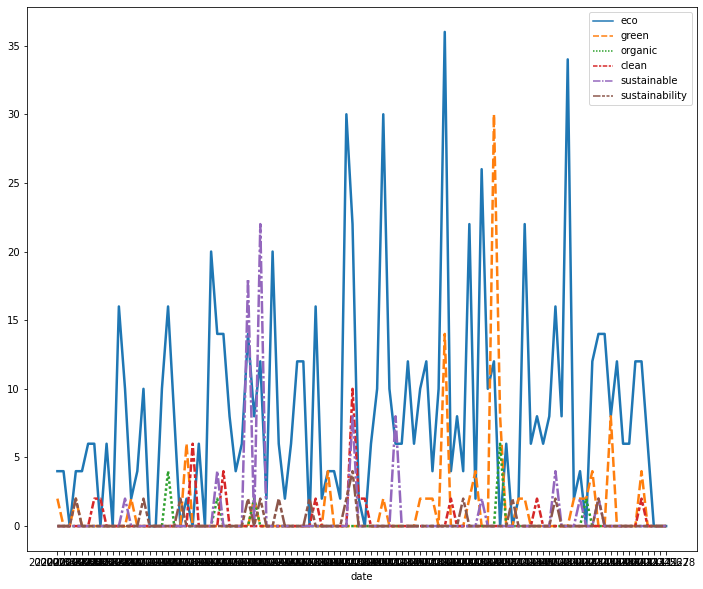

In [144]:
fig, ax = plt.subplots(figsize = (12, 10))
sns.lineplot(data=dtdf, linewidth=2.5)

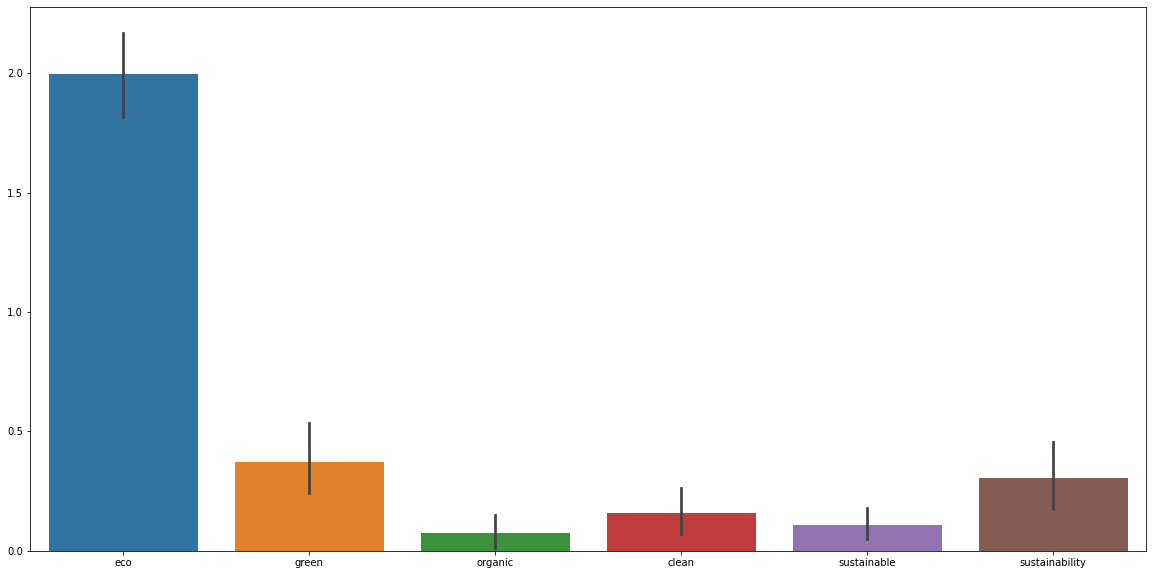

In [125]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data=dtdf, linewidth=2.5)

In [149]:
#states = ['TX', 'IL', 'CA', 'FL']
#selected_states = us_states[us_states['state'].isin(states)]
import altair as alt


alt.Chart().mark_circle().encode(
    x=alt.X('date'),
    y=alt.Y('eco'),
    color='eco',
    size=alt.Size('eco',
        scale=alt.Scale(range=[0, 200]),
        legend=alt.Legend(title='Daily new cases')
)
).properties(
    width=600,
    height=300)

ValueError: eco encoding field is specified without a type; the type cannot be automatically inferred because the data is not specified as a pandas.DataFrame.

alt.Chart(...)

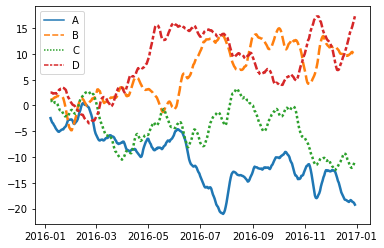

In [57]:

#sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [64]:
data

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-26,-18.482826,10.330142,-12.108625,14.878444
2016-12-27,-18.693797,10.391382,-12.020502,15.376387
2016-12-28,-18.752957,10.062616,-11.685921,15.996722
2016-12-29,-18.918042,9.957435,-11.244617,16.669990
